In [1]:
import pandas as pd
data = pd.read_csv("data/metadata_encode_all.txt.gz", compression = "gzip", sep="\t")

/home/vsfishman/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,20,23,24,27,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
pd.set_option('display.max_columns', None)
data

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
0,ENCFF781GYO,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,1,1_1,100.0,NaN,paired-ended,1.0,/files/ENCFF748HNR/,NaN,NaN,3348122249,"Brenton Graveley, UConn",f2ed753babff4d0ac21de8929773d08c,SRA:SRR4422129,https://www.encodeproject.org/files/ENCFF781GY...,NaN,Illumina HiSeq 2000,"/files/ENCFF385GEX/, /files/ENCFF403CZA/",released,s3://encode-public/2014/12/13/14c39310-ff5f-44...,missing biosample characterization,NaN,NaN
1,ENCFF521PWU,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,2,2_1,100.0,NaN,paired-ended,1.0,/files/ENCFF934BDQ/,NaN,NaN,2596104321,"Brenton Graveley, UConn",81f2b8e9405c79cd217a1e6ef2f93d8c,SRA:SRR4422128,https://www.encodeproject.org/files/ENCFF521PW...,NaN,Illumina HiSeq 2000,"/files/ENCFF385GEX/, /files/ENCFF403CZA/",released,s3://encode-public/2014/12/13/43a9dff7-d4e3-49...,missing biosample characterization,NaN,NaN
2,ENCFF748HNR,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,1,1_1,100.0,NaN,paired-ended,2.0,/files/ENCFF781GYO/,NaN,NaN,3239192567,"Brenton Graveley, UConn",9d03993de49ae4b6a78d3b7570df217f,SRA:SRR4422129,https://www.encodeproject.org/files/ENCFF748HN...,NaN,Illumina HiSeq 2000,"/files/ENCFF922CDR/, /files/ENCFF278TEH/",released,s3://encode-public/2014/12/13/d4eadc94-e45e-4e...,missing biosample characterization,NaN,NaN
3,ENCFF934BDQ,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,2,2_1,100.0,NaN,paired-ended,2.0,/files/ENCFF521PWU/,NaN,NaN,2508689891,"Brenton Graveley, UConn",3827eb377253ff0cb97e110fe514ce2c,SRA:SRR4422128,https://www.encodeproject.org/files/ENCFF934BD...,NaN,Illumina HiSeq 2000,"/files/ENCFF922CDR/, /files/ENCFF278TEH/",released,s3://encode-public/2014/12/13/c44057d9-c8fc-4e...,missing biosample characterization,NaN,NaN
4,ENCFF743IBK,bam,bam,NaN,alignments,hg19,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/

In [12]:
data["File assembly"].unique()

array([nan, 'hg19', 'GRCh38', 'ce10', 'ce11', 'mm9', 'mm10', 'dm3', 'dm6',
       'mm10-minimal', 'GRCh38-minimal'], dtype=object)

In [15]:
data["File format"].unique()

array(['fastq', 'bam', 'bigWig', 'tsv', 'tar', 'bigBed broadPeak',
       'bed broadPeak', 'bed narrowPeak', 'bigBed narrowPeak',
       'bed idr_ranked_peak', 'tagAlign', 'bed bedMethyl',
       'bigBed bedMethyl', 'bigBed bed3+', 'bigBed bedRnaElements', 'gtf',
       'bed bedRnaElements', 'bigBed bedExonScore', 'bed bedExonScore',
       'bigBed tss_peak', 'gff gff3', 'bed tss_peak', 'bed bed3+',
       'starch', 'bed idr_peak', 'bigBed idr_peak', 'bigBed bed12',
       'bed bed12', 'csfasta', 'csqual', 'rcc', 'bed bed6+',
       'bigBed bed6+', 'bigBed bed9', 'bed bed9', 'bigBed bedLogR',
       'bed bedLogR', 'hic', 'bedpe', 'fasta', 'bigBed peptideMapping',
       'bed peptideMapping', 'bed bedGraph', 'idat', 'sam', 'wig',
       'bigInteract', 'vcf', 'CEL', 'hdf5', 'bigBed modPepMap',
       'bigBed pepMap', 'bed modPepMap', 'bed pepMap', 'bed bed3',
       'bigBed bed3'], dtype=object)

In [49]:
def DNAseIfilter(x):
    return x["Output type"] == "read-depth normalized signal" and \
           x["Assay"]=="DNase-seq" and \
           x["File format"]=="bigWig" and \
           pd.isna(x["Audit ERROR"]) and \
           x["File assembly"] in ["mm10","mm10-minimal","GRCh38","GRCh38-minimal"]

DNAseIdata = data[data.apply(DNAseIfilter,axis="columns")]
DNAseIdata

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
2067,ENCFF265OYU,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF258GAN/,748878487,ENCODE Processing Pipeline,cdb21169b04b3d0c8b03494fe34cf803,NaN,https://www.encodeproject.org/files/ENCFF265OY...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/c134a36f-d043-4f...,NaN,NaN,NaN
2068,ENCFF334GMP,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF440ZDB/,747693650,ENCODE Processing Pipeline,227057efb5b12603efac3455647280b4,NaN,https://www.encodeproject.org/files/ENCFF334GM...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/a1e8a3b7-f2f9-49...,NaN,NaN,NaN
2100,ENCFF368JGS,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF206ALY/, /files/ENCFF180EJG/",713814915,ENCODE Processing Pipeline,9194f1179681a19bf2ca9af9f3dc6e6b,NaN,https://www.encodeproject.org/files/ENCFF368JG...,NaN,NaN,NaN,released,s3://encode-public/2020/11/06/2ff5c377-1f47-46...,NaN,NaN,NaN
2101,ENCFF405MMH,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF180EJG/, /files/ENCFF291ZMA/",713789050,ENCODE Processing Pipeline,b1de4cc7ee89e25d7b530c8a21eecc83,NaN,https://www.encodeproject.org/files/ENCFF405MM...,NaN,NaN,NaN,released,s3://encode-public/2020/11/06/44283fd1-8ef1-41...,NaN,NaN,NaN
2374,ENCFF300QLZ,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ELV,DNase-seq,EFO:0005913,urothelium cell line,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2011-04-19,ENCODE,NaN,see document,NaN,1,"1_1, 1_2",NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF150FTD/,746828767,ENCODE Processing Pipeline,b365a22faa495be37d9cef633bec2ef3,NaN,https://www.encodeproject.org/files/ENCFF300QL...,NaN,NaN,NaN,released,s3://encode-public/2017/10/03/515cc055-809e-49...,"low spot score, mixed read lengths",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579670,ENCFF481RXU,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR768AWY,DNase-seq,CL:0000896,"activated CD4-positive, alpha-beta T cell",primary cell,Homo sapiens,"Interleukin-2, a

In [50]:
DNAseIdata["Output type"].unique()

array(['read-depth normalized signal'], dtype=object)

In [17]:
import nbimporter
from Encode_EDA import relabel_data

Importing Jupyter notebook from Encode_EDA.ipynb


In [51]:
DNAseIdata_relabeled = DNAseIdata.apply(relabel_data, axis = 1)

In [52]:
DNAseIdata_relabeled

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,full_assay,full_cell_type,modified_cell_type
2067,ENCFF265OYU,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF258GAN/,748878487,ENCODE Processing Pipeline,cdb21169b04b3d0c8b03494fe34cf803,NaN,https://www.encodeproject.org/files/ENCFF265OY...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/c134a36f-d043-4f...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False
2068,ENCFF334GMP,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF440ZDB/,747693650,ENCODE Processing Pipeline,227057efb5b12603efac3455647280b4,NaN,https://www.encodeproject.org/files/ENCFF334GM...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/a1e8a3b7-f2f9-49...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False
2100,ENCFF368JGS,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF206ALY/, /files/ENCFF180EJG/",713814915,ENCODE Processing Pipeline,9194f1179681a19bf2ca9af9f3dc6e6b,NaN,https://www.encodeproject.org/files/ENCFF368JG...,NaN,NaN,NaN,released,s3://encode-public/2020/11/06/2ff5c377-1f47-46...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False
2101,ENCFF405MMH,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF180EJG/, /files/ENCFF291ZMA/",713789050,ENCODE Processing Pipeline,b1de4cc7ee89e25d7b530c8a21eecc83,NaN,https://www.encodeproject.org/files/ENCFF405MM...,NaN,NaN,NaN,released,s3://encode-public/2020/11/06/44283fd1-8ef1-41...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False
2374,ENCFF300QLZ,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ELV,DNase-seq,EFO:0005913,urothelium cell line,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2011-04-19,ENCODE,NaN,see document,NaN,1,"1_1, 1_2",NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF150FTD/,746828767,ENCODE Processing Pipeline,b365a22faa495be37d9cef633bec2ef3,NaN,https://www.encodeproject.org/files/ENCFF300QL...,NaN,NaN,NaN,released,s3://encode-public/2017/10/03/515cc055-809e-49...,"low spot score, mixed read lengths",NaN,NaN,DNase-seq,urothelium cell line.cell line.Homo sapiens.0....,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [54]:
tmp = DNAseIdata_relabeled.sort_values(by=["full_cell_type","Technical replicate(s)"])
dups = tmp.duplicated(subset=["full_cell_type","Technical replicate(s)"],keep=False)
test = tmp[dups].iloc[0:10,:]
test

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,full_assay,full_cell_type,modified_cell_type
322650,ENCFF961CBL,bigWig,bigWig,NaN,read-depth normalized signal,mm10,ENCSR687EAW,DNase-seq,EFO:0001084,3T3-L1,cell line,Mus musculus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2015-10-14,ENCODE,NaN,NaN,NaN,1,"1_1, 1_3",NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF749IUT/, /files/ENCFF389NKZ/",667823125,ENCODE Processing Pipeline,760fce5ab8680ad92db60acb11d5c736,NaN,https://www.encodeproject.org/files/ENCFF961CB...,NaN,NaN,NaN,released,s3://encode-public/2020/10/20/9ec014bb-9e16-43...,"low spot score, low read depth",NaN,NaN,DNase-seq,3T3-L1.cell line.Mus musculus.0.0.0.0.0.0.0.0.0,False
322655,ENCFF435DKT,bigWig,bigWig,NaN,read-depth normalized signal,mm10,ENCSR687EAW,DNase-seq,EFO:0001084,3T3-L1,cell line,Mus musculus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2015-10-14,ENCODE,NaN,NaN,NaN,1,"1_1, 1_3",NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF010ICI/,702204140,ENCODE Processing Pipeline,9617fb7b63f92eaba61dbaa6c8509554,NaN,https://www.encodeproject.org/files/ENCFF435DK...,NaN,NaN,NaN,released,s3://encode-public/2017/08/24/9feeecd9-0e0f-45...,"low spot score, low read depth",NaN,NaN,DNase-seq,3T3-L1.cell line.Mus musculus.0.0.0.0.0.0.0.0.0,False
322648,ENCFF109BQK,bigWig,bigWig,NaN,read-depth normalized signal,mm10,ENCSR687EAW,DNase-seq,EFO:0001084,3T3-L1,cell line,Mus musculus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2015-10-14,ENCODE,NaN,NaN,NaN,2,"2_1, 2_2",NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF749IUT/, /files/ENCFF269GCM/",508527496,ENCODE Processing Pipeline,ca8eeb955f9c2975fde7992ed52624d3,NaN,https://www.encodeproject.org/files/ENCFF109BQ...,NaN,NaN,NaN,released,s3://encode-public/2020/10/20/fdf06623-389b-44...,"low spot score, low read depth",NaN,NaN,DNase-seq,3T3-L1.cell line.Mus musculus.0.0.0.0.0.0.0.0.0,False
322656,ENCFF148PBB,bigWig,bigWig,NaN,read-depth normalized signal,mm10,ENCSR687EAW,DNase-seq,EFO:0001084,3T3-L1,cell line,Mus musculus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2015-10-14,ENCODE,NaN,NaN,NaN,2,"2_1, 2_2",NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF126SYO/,547393449,ENCODE Processing Pipeline,c05c6fde353f96c0207f941c2eeb3c29,NaN,https://www.encodeproject.org/files/ENCFF148PB...,NaN,NaN,NaN,released,s3://encode-public/2017/08/24/f007e129-7ba5-4e...,"low spot score, low read depth",NaN,NaN,DNase-seq,3T3-L1.cell line.Mus musculus.0.0.0.0.0.0.0.0.0,False
34025,ENCFF866ZTV,bigWig,bigWig,NaN,read-depth normalized signal,mm10,ENCSR000CMK,DNase-seq,EFO:0005482,416B,cell line,Mus musculus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2011-07-01,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF487DED/,664977219,ENCODE Processing Pipeline,479a37116a4a800e214c59153934a9f1,NaN,https://www.encodeproject.org/files/ENCFF866ZT...,NaN,NaN,NaN,released,s3://encode-public/2018/05/22/e270d394-f432-4c...,low read depth,NaN,NaN,DN

In [57]:
# Strange thinks happen... same data could be processed 2 times using different Encode piplenies
# This results in 2 bigWig files with the identical metadata
# I found that newer files were derived from 2 files, whereas older from one (the data itself is not in the metadata)
# Trying to utilize this....

DNAseIdata_relabeled["Nfiles"] = DNAseIdata_relabeled["Derived from"].apply(lambda x: x.count(","))
tmp = DNAseIdata_relabeled.sort_values(by=["full_cell_type","Technical replicate(s)","Nfiles"])
dups = tmp.duplicated(subset=["full_cell_type","Technical replicate(s)","Nfiles"],keep=False)
test = tmp[dups].iloc[0:10,:]
test

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,full_assay,full_cell_type,modified_cell_type,Nfiles
34228,ENCFF541BTE,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ELW,DNase-seq,EFO:0001086,A549,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2016-07-21,ENCODE,NaN,see document,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF180EJG/, /files/ENCFF194GNS/",561967920,ENCODE Processing Pipeline,605d76920ffc2580c055f81e2e1648fa,NaN,https://www.encodeproject.org/files/ENCFF541BT...,NaN,NaN,NaN,released,s3://encode-public/2020/11/18/4c2df182-b24d-40...,low read depth,NaN,NaN,DNase-seq,A549.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,1
341717,ENCFF186FMX,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR136DNA,DNase-seq,EFO:0001086,A549,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2016-05-05,GGR,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF564QFI/, /files/ENCFF635XTF/",529391114,ENCODE Processing Pipeline,696a5fc8bcc2058422e2eaf7cfa90d0c,NaN,https://www.encodeproject.org/files/ENCFF186FM...,NaN,NaN,NaN,released,s3://encode-public/2020/11/12/ef21cf41-c2a3-48...,NaN,NaN,NaN,DNase-seq,A549.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,1
357482,ENCFF452URQ,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000EMJ,DNase-seq,CL:0000236,B cell,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2011-10-19,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF180EJG/, /files/ENCFF868MNL/",693714310,ENCODE Processing Pipeline,1b6c3a38fac8576d1b3b98f29d04f13c,NaN,https://www.encodeproject.org/files/ENCFF452UR...,NaN,NaN,NaN,released,s3://encode-public/2020/11/18/8ca5a226-11bc-49...,low read depth,NaN,NaN,DNase-seq,B cell.primary cell.Homo sapiens.0.0.0.0.0.0.0...,False,1
522203,ENCFF429CVH,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR468AKF,DNase-seq,CL:0000236,B cell,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2020-10-05,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF213FNG/, /files/ENCFF162AKB/",676811769,ENCODE Processing Pipeline,7d2b1b1105bb7159f1aa05964ceec88c,NaN,https://www.encodeproject.org/files/ENCFF429CV...,NaN,NaN,NaN,released,s3://encode-public/2020/10/02/327322da-4253-4a...,NaN,NaN,NaN,DNase-seq,B cell.primary cell.Homo sapiens.0.0.0.0.0.0.0...,False,1
169573,ENCFF134KAD,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR381PXW,DNase-seq,CL:0000236,B cell,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2013-07-31,Roadmap,NaN,NaN,NaN,1,"1_1, 1_2",NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF180EJG/, /files/ENCFF822OGI/",758500557,ENCODE Processing Pipeline,f4c88d90b617a6e8be415863d6192a5f,NaN,https://www.encodeproject.org/files/ENCFF134KA...,NaN,NaN,NaN,released,s3://encode-public/2020/11/16/7b8f4b37-1480-4a...,NaN,NaN,NaN,DNase-seq,B cell.primar

In [58]:
import requests, json
 
# Force return from the server in JSON format
headers = {'accept': 'application/json'}
 
# This URL locates the ENCODE biosample with accession number ENCBS000AAA
url = 'https://www.encodeproject.org/files/ENCFF962YGV/?frame=object'
 
# GET the object
response = requests.get(url, headers=headers)
 
# Extract the JSON response as a Python dictionary
biosample = response.json()

# Print the Python object
print(json.dumps(biosample, indent=4))

{
    "accession": "ENCFF962YGV",
    "aliases": [
        "encode-processing-pipeline:c3cf9801-f2ec-429a-834a-9c99c40dffef-dnase-production-caper_out_09242020-dnase-4ac35c57-a923-48b3-bcbe-48dce9a758cc-call-dnase_replicate-shard-0-dnase_replicate-fae737af-246a-4a35-a0f1-1a49fe4a21c5-call-normalize_and_convert_files-normalize_and_convert_files-2d76279e-ef09-4918-b612-c2537cab9ea2-call-normalize-normalize-081e5405-020c-4694-8e80-d98aa29ad5af-call-make_bigwig_from_starch-make_bigwig_from_starch-569d9669-2fbf-46b7-a74c-dbc5316ea615-call-starch_to_bigwig-normalized.nuclear.0.05.density.bw"
    ],
    "schema_version": "28",
    "lab": "/labs/encode-processing-pipeline/",
    "award": "/awards/U24HG009397/",
    "date_created": "2020-11-06T17:56:15.782604+00:00",
    "submitted_by": "/users/43f2f757-5cbf-490a-9787-a1ee85a4cdcd/",
    "alternate_accessions": [],
    "file_format": "bigWig",
    "no_file_available": false,
    "submitted_file_name": "gs://dnase-production/caper_out_09242020/d

In [69]:
# Force return from the server in JSON format
headers = {'accept': 'application/json'}
 
# This URL locates the ENCODE biosample with accession number ENCBS000AAA
url = 'https://www.encodeproject.org/search/?type=File&accession=ENCFF385DEA&accession=ENCFF993MFJ&frame=embedded'
#accession=ENCFF385DEA

# GET the object
response = requests.get(url, headers=headers)
 
# Extract the JSON response as a Python dictionary
biosample = response.json()

# Print the Python object
print(json.dumps(biosample, indent=4))

{
    "@context": "/terms/",
    "@graph": [
        {
            "@id": "/files/ENCFF993MFJ/",
            "@type": [
                "File",
                "Item"
            ],
            "accession": "ENCFF993MFJ",
            "aliases": [
                "encode-processing-pipeline:c739990f-24a3-4dc3-b02e-129c0ce2abbc-dnase-production-caper_out_10162020-dnase-c739990f-24a3-4dc3-b02e-129c0ce2abbc-call-dnase_replicate-shard-0-dnase_replicate-3bf9c575-4dba-49da-b08f-567803b85a3c-call-normalize_and_convert_files-normalize_and_convert_files-e27aff66-c1d7-4207-b958-4c7f84cbb055-call-normalize-normalize-aef5867b-4ac1-454e-af29-5cd2fc4420ae-call-make_bigwig_from_starch-make_bigwig_from_starch-d9ec33dd-89b3-4d92-b4a2-f6e034c45062-call-starch_to_bigwig-normalized.nuclear.0.05.density.bw"
            ],
            "alternate_accessions": [],
            "analysis_step_version": {
                "schema_version": "4",
                "aliases": [
                    "encode:dnase-peak-ca

In [98]:
# ok, lets get all metadata for all files in the table

chunksize = 100
additional_metadata = []
l = len(DNAseIdata_relabeled["File accession"].values)
for i in range(0,l,chunksize):
    req = "&accession=".join(
        DNAseIdata_relabeled["File accession"].values[i:min(i+chunksize,l)])
    url = 'https://www.encodeproject.org/search/?type=File&accession='+req+'&frame=embedded&limit=all'

    # GET the object
    response = requests.get(url, headers=headers)

    # Extract the JSON response as a Python dictionary
    additional_metadata += response.json()["@graph"]
    print (len(response.json()["@graph"]))OO
    
    print ("Processed ",i," out of ",l)
    

100
Processed  0  out of  2669
100
Processed  100  out of  2669
100
Processed  200  out of  2669
100
Processed  300  out of  2669
100
Processed  400  out of  2669
100
Processed  500  out of  2669
100
Processed  600  out of  2669
100
Processed  700  out of  2669
100
Processed  800  out of  2669
100
Processed  900  out of  2669
100
Processed  1000  out of  2669
100
Processed  1100  out of  2669
100
Processed  1200  out of  2669
100
Processed  1300  out of  2669
100
Processed  1400  out of  2669
100
Processed  1500  out of  2669
100
Processed  1600  out of  2669
100
Processed  1700  out of  2669
100
Processed  1800  out of  2669
100
Processed  1900  out of  2669
100
Processed  2000  out of  2669
100
Processed  2100  out of  2669
100
Processed  2200  out of  2669
100
Processed  2300  out of  2669
100
Processed  2400  out of  2669
100
Processed  2500  out of  2669
69
Processed  2600  out of  2669


In [99]:
len(additional_metadata)

2669

In [106]:
# TODO
# think about duplicates.
# for example, "ENCFF791QXM","ENCFF993MFJ" are two files with same metadata generated from male and female
# for now, keep them as replics

In [110]:
# Total data size
DNAseIdata_relabeled["Size"].sum() // 1e+9

1688.0

In [113]:
# ok, let's filter out mouse data and modified cell types
def filter2(x):
        return x["File assembly"] in ["GRCh38"] and \
               not x["modified_cell_type"]
        
DNAseIdata_relabeled_sample = DNAseIdata_relabeled[DNAseIdata_relabeled.apply(filter2, axis="columns")]
DNAseIdata_relabeled_sample

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,full_assay,full_cell_type,modified_cell_type,Nfiles
2067,ENCFF265OYU,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF258GAN/,748878487,ENCODE Processing Pipeline,cdb21169b04b3d0c8b03494fe34cf803,NaN,https://www.encodeproject.org/files/ENCFF265OY...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/c134a36f-d043-4f...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,0
2068,ENCFF334GMP,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF440ZDB/,747693650,ENCODE Processing Pipeline,227057efb5b12603efac3455647280b4,NaN,https://www.encodeproject.org/files/ENCFF334GM...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/a1e8a3b7-f2f9-49...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,0
2100,ENCFF368JGS,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF206ALY/, /files/ENCFF180EJG/",713814915,ENCODE Processing Pipeline,9194f1179681a19bf2ca9af9f3dc6e6b,NaN,https://www.encodeproject.org/files/ENCFF368JG...,NaN,NaN,NaN,released,s3://encode-public/2020/11/06/2ff5c377-1f47-46...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,1
2101,ENCFF405MMH,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF180EJG/, /files/ENCFF291ZMA/",713789050,ENCODE Processing Pipeline,b1de4cc7ee89e25d7b530c8a21eecc83,NaN,https://www.encodeproject.org/files/ENCFF405MM...,NaN,NaN,NaN,released,s3://encode-public/2020/11/06/44283fd1-8ef1-41...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,1
2374,ENCFF300QLZ,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ELV,DNase-seq,EFO:0005913,urothelium cell line,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2011-04-19,ENCODE,NaN,see document,NaN,1,"1_1, 1_2",NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF150FTD/,746828767,ENCODE Processing Pipeline,b365a22faa495be37d9cef633bec2ef3,NaN,https://www.encodeproject.org/files/ENCFF300QL...,NaN,NaN,NaN,released,s3://encode-public/2017/10/03/515cc055-809e-49...,"low spot score, mixed read lengths",NaN,NaN,DNase-seq,urothelium cell line.cell line.Homo sapiens.0....,False,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [115]:
DNAseIdata_relabeled_sample_nodup = DNAseIdata_relabeled_sample.drop_duplicates(subset="Biosample term name",keep="first")
DNAseIdata_relabeled_sample_nodup

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,full_assay,full_cell_type,modified_cell_type,Nfiles
2067,ENCFF265OYU,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR275ICP,DNase-seq,EFO:0003045,H9,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-12-13,ENCODE,NaN,NaN,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF258GAN/,748878487,ENCODE Processing Pipeline,cdb21169b04b3d0c8b03494fe34cf803,NaN,https://www.encodeproject.org/files/ENCFF265OY...,NaN,NaN,NaN,released,s3://encode-public/2017/11/26/c134a36f-d043-4f...,NaN,NaN,NaN,DNase-seq,H9.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,0
2374,ENCFF300QLZ,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ELV,DNase-seq,EFO:0005913,urothelium cell line,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2011-04-19,ENCODE,NaN,see document,NaN,1,"1_1, 1_2",NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF150FTD/,746828767,ENCODE Processing Pipeline,b365a22faa495be37d9cef633bec2ef3,NaN,https://www.encodeproject.org/files/ENCFF300QL...,NaN,NaN,NaN,released,s3://encode-public/2017/10/03/515cc055-809e-49...,"low spot score, mixed read lengths",NaN,NaN,DNase-seq,urothelium cell line.cell line.Homo sapiens.0....,False,0
2739,ENCFF830FDL,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ENO,DNase-seq,EFO:0002791,HeLa-S3,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2010-12-16,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF147IMV/,558134977,ENCODE Processing Pipeline,4256160cf2da40f58fde958da113f9b3,NaN,https://www.encodeproject.org/files/ENCFF830FD...,NaN,NaN,NaN,released,s3://encode-public/2017/08/24/5baee494-b650-4a...,low read depth,NaN,NaN,DNase-seq,HeLa-S3.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0,False,0
3061,ENCFF463QGX,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ENG,DNase-seq,CL:0002590,smooth muscle cell of the brain vasculature,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2012-03-06,ENCODE,NaN,see document,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF994IJJ/,569671410,ENCODE Processing Pipeline,fa2671f0b5a95c77b97e3b37a614050b,NaN,https://www.encodeproject.org/files/ENCFF463QG...,NaN,NaN,NaN,released,s3://encode-public/2017/08/24/04a5dfbc-0790-4b...,"low spot score, low read depth",NaN,NaN,DNase-seq,smooth muscle cell of the brain vasculature.pr...,False,0
6916,ENCFF021NBR,bigWig,bigWig,NaN,read-depth normalized signal,GRCh38,ENCSR000ENL,DNase-seq,CL:0000706,choroid plexus epithelial cell,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2010-12-14,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF179EGA/,699984869,ENCODE Processing Pipeline,bc9c39cebb0616c5b73b788eaca677e0,NaN,https://www.encodeproject.org/files/ENCFF021NB...,NaN,NaN,NaN,released,s3://encode-public/2017/08/24/7f26afba-c681-4c...,low read dept

In [116]:
DNAseIdata_relabeled_sample_nodup["Size"].sum() // 1e+9

195.0

In [118]:
DNAseIdata_relabeled_sample_nodup.to_csv("DNAseIdata_relabeled_sample_nodup.csv",index=False,header=True,sep="\t")

In [121]:
list(DNAseIdata_relabeled_sample_nodup.columns).index("File download URL")

46

In [124]:
for i in range(47):
    print (i, list(DNAseIdata_relabeled_sample_nodup.columns)[i])


0 File accession
1 File format
2 File type
3 File format type
4 Output type
5 File assembly
6 Experiment accession
7 Assay
8 Biosample term id
9 Biosample term name
10 Biosample type
11 Biosample organism
12 Biosample treatments
13 Biosample treatments amount
14 Biosample treatments duration
15 Biosample genetic modifications methods
16 Biosample genetic modifications categories
17 Biosample genetic modifications targets
18 Biosample genetic modifications gene targets
19 Biosample genetic modifications site coordinates
20 Biosample genetic modifications zygosity
21 Experiment target
22 Library made from
23 Library depleted in
24 Library extraction method
25 Library lysis method
26 Library crosslinking method
27 Library strand specific
28 Experiment date released
29 Project
30 RBNS protein concentration
31 Library fragmentation method
32 Library size range
33 Biological replicate(s)
34 Technical replicate(s)
35 Read length
36 Mapped read length
37 Run type
38 Paired end
39 Paired with
4

In [128]:
import pyBigWig
bw = pyBigWig.open("data/2020-03-05-DNAseI_bigWig/ENCFF015IAT.bigWig")
bw.chroms()

{'chr1': 248956422,
 'chr10': 133797422,
 'chr11': 135086622,
 'chr11_KI270721v1_random': 100316,
 'chr12': 133275309,
 'chr13': 114364328,
 'chr14': 107043718,
 'chr14_GL000009v2_random': 201709,
 'chr14_GL000194v1_random': 191469,
 'chr14_GL000225v1_random': 211173,
 'chr14_KI270722v1_random': 194050,
 'chr14_KI270723v1_random': 38115,
 'chr14_KI270724v1_random': 39555,
 'chr14_KI270725v1_random': 172810,
 'chr14_KI270726v1_random': 43739,
 'chr15': 101991189,
 'chr15_KI270727v1_random': 448248,
 'chr16': 90338345,
 'chr16_KI270728v1_random': 1872759,
 'chr17': 83257441,
 'chr17_GL000205v2_random': 185591,
 'chr17_KI270729v1_random': 280839,
 'chr17_KI270730v1_random': 112551,
 'chr18': 80373285,
 'chr19': 58617616,
 'chr1_KI270706v1_random': 175055,
 'chr1_KI270707v1_random': 32032,
 'chr1_KI270708v1_random': 127682,
 'chr1_KI270709v1_random': 66860,
 'chr1_KI270710v1_random': 40176,
 'chr1_KI270711v1_random': 42210,
 'chr1_KI270712v1_random': 176043,
 'chr1_KI270713v1_random': 4074

In [151]:
print((bw.chroms()["chr10"]//100)*100)
a=bw.stats("chr10",0,(bw.chroms()["chr10"]//100)*100,"sum",nBins=bw.chroms()["chr10"]//100)

133797400


In [152]:
import numpy as np
np.nonzero(a)
print (len(np.nonzero(a)[0]), bw.chroms()["chr10"]//100)
print (np.nonzero(a))

1207359 1337974
(array([    114,     115,     131, ..., 1337871, 1337872, 1337873]),)


<ipython-input-156-0578691ddb7e>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


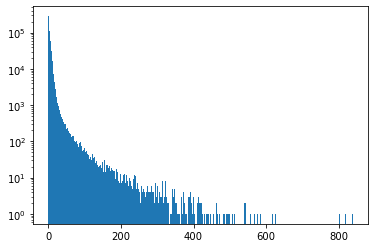

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(a, bins=1000)
plt.yscale('log', nonposy='clip')

In [162]:
tmp = pd.DataFrame({"chr":["chr10"]*len(a),
              "start":range(0,(bw.chroms()["chr10"]//100)*100,100),
              "end":range(100,(bw.chroms()["chr10"]//100)*100+100,100),
              "signal":a,
              "cell_type":[1]*len(a)})
tmp.to_csv("chr10.tmp.csv",sep="\t",index=False)
tmp

,chr,start,end,signal,cell_type
0,chr10,0,100,0.0,1
1,chr10,100,200,0.0,1
2,chr10,200,300,0.0,1
3,chr10,300,400,0.0,1
4,chr10,400,500,0.0,1
...,...,...,...,...,...
1337969,chr10,133796900,133797000,0.0,1
1337970,chr10,133797000,133797100,0.0,1
1337971,chr10,133797100,133797200,0.0,1
1337972,chr10,133797200,133797300,0.0,1


In [163]:
!ls -lh chr10.tmp.csv 

-rw-rw-r-- 1 vsfishman vsfishman 56M Mar  8 16:18 chr10.tmp.csv


In [165]:
56*23*289 // 1000

372